In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

from scripts.path import return_path
PATH = return_path() + 'anscombe_quartet/'

# DATA GATHERING

In [3]:
# Read the data
df = pd.read_csv(os.path.join(PATH, 'anscombe_quartet.csv'))
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


# COMPUTATION 

In [4]:
# Describe the data and show its mean, std. dev., and variance
desc = df.describe().iloc[[1,2],:]
desc = desc.append(df.var().T, ignore_index = True)
desc.rename({0: 'mean', 1: 'std. dev.', 2: 'variance'}, axis=0, inplace=True)
desc

,x1,y1,x2,y2,x3,y3,x4,y4
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std. dev.,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
variance,11.000000,4.127269,11.000000,4.127629,11.000000,4.122620,11.000000,4.123249


In [5]:
# Compute the Correlation coefficient of the 4 sets of variables
for x in range(0, 8, 2):
    title = df.iloc[:, x].name + ' and ' + df.iloc[:, x+1].name
    r = np.corrcoef(df.iloc[:,x], df.iloc[:,x+1])
    print('The Correlation Coefficient of ' + title + ' is = ' + '%.4f' % r[0,1])

The Correlation Coefficient of x1 and y1 is = 0.8164
The Correlation Coefficient of x2 and y2 is = 0.8162
The Correlation Coefficient of x3 and y3 is = 0.8163
The Correlation Coefficient of x4 and y4 is = 0.8165


The Regression Line Equation of x1 and y1 is = 0.5001x + 3.0001
The R^2 score of x1 and y1 is = 0.6665

The Regression Line Equation of x2 and y2 is = 0.5000x + 3.0009
The R^2 score of x2 and y2 is = 0.6662

The Regression Line Equation of x3 and y3 is = 0.4997x + 3.0025
The R^2 score of x3 and y3 is = 0.6663

The Regression Line Equation of x4 and y4 is = 0.4999x + 3.0017
The R^2 score of x4 and y4 is = 0.6667



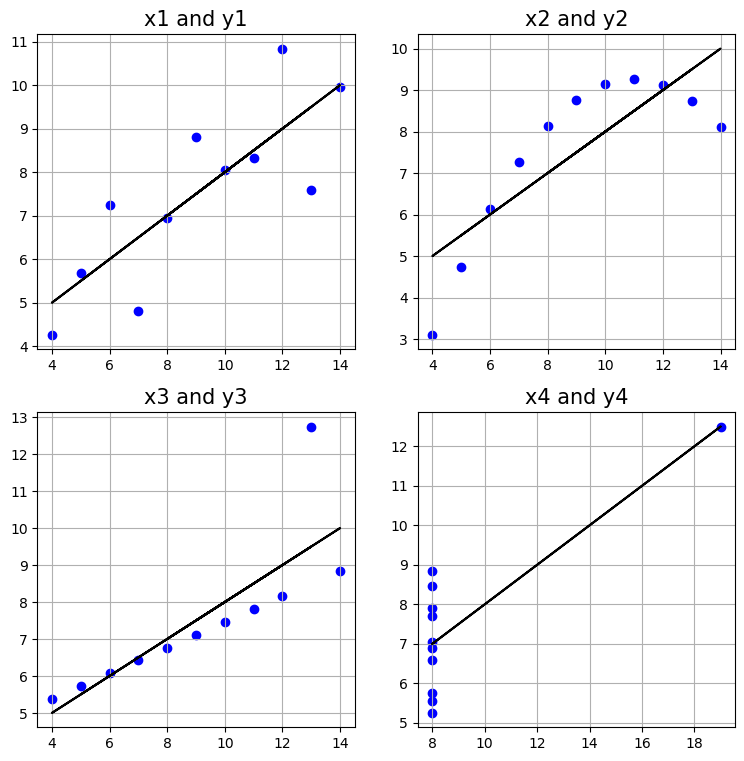

In [6]:
# Compute Regression Line coefficient and intercept, R-squared score,
# and show scatter plot with best fit line

# Initialize variables
lr = LinearRegression()
ax = [0, 1, 2, 3]
fig, ((ax[0], ax[1]), (ax[2], ax[3])) = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

# Actual process
for x in range(4):
    data_x = np.array(df.iloc[:,x*2]).reshape(-1,1)
    data_y = np.array(df.iloc[:,x*2+1]).reshape(-1,1)
    title = df.iloc[:, x*2].name + ' and ' + df.iloc[:, x*2+1].name
    lr.fit(data_x, data_y)
    predict = lr.predict(data_x)
    
    # Print regression line equation
    coef = '%.4f' % lr.coef_[0][0] + 'x'
    inter = '%.4f' % lr.intercept_[0]
    print('The Regression Line Equation of ' + title + ' is = ' + coef + ' + ' + inter)
    
    # Print R-squared score
    r_2 = '%.4f' % r2_score(data_y, predict)
    print('The R^2 score of ' + title + ' is = ' + r_2 + '\n')
    
    # Show scatter plot
    ax[x].set_title(title, fontsize = 15)
    ax[x].scatter(data_x, data_y, color='Blue')
    ax[x].plot(data_x, predict, color='Black')
    ax[x].grid()
plt.show()